<a href="https://colab.research.google.com/github/sooloin/LinearAlgebra2_assignment/blob/main/%EB%B6%93%EA%BD%83_%EB%B6%84%EB%A5%98_202310878_%EC%A1%B0%EC%88%98%EB%B9%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import csv

In [14]:
from google.colab import files

files.upload()

Saving Iris.csv to Iris (2).csv


{'Iris (2).csv': b'Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species\n1,5.1,3.5,1.4,0.2,Iris-setosa\n2,4.9,3.0,1.4,0.2,Iris-setosa\n3,4.7,3.2,1.3,0.2,Iris-setosa\n4,4.6,3.1,1.5,0.2,Iris-setosa\n5,5.0,3.6,1.4,0.2,Iris-setosa\n6,5.4,3.9,1.7,0.4,Iris-setosa\n7,4.6,3.4,1.4,0.3,Iris-setosa\n8,5.0,3.4,1.5,0.2,Iris-setosa\n9,4.4,2.9,1.4,0.2,Iris-setosa\n10,4.9,3.1,1.5,0.1,Iris-setosa\n11,5.4,3.7,1.5,0.2,Iris-setosa\n12,4.8,3.4,1.6,0.2,Iris-setosa\n13,4.8,3.0,1.4,0.1,Iris-setosa\n14,4.3,3.0,1.1,0.1,Iris-setosa\n15,5.8,4.0,1.2,0.2,Iris-setosa\n16,5.7,4.4,1.5,0.4,Iris-setosa\n17,5.4,3.9,1.3,0.4,Iris-setosa\n18,5.1,3.5,1.4,0.3,Iris-setosa\n19,5.7,3.8,1.7,0.3,Iris-setosa\n20,5.1,3.8,1.5,0.3,Iris-setosa\n21,5.4,3.4,1.7,0.2,Iris-setosa\n22,5.1,3.7,1.5,0.4,Iris-setosa\n23,4.6,3.6,1.0,0.2,Iris-setosa\n24,5.1,3.3,1.7,0.5,Iris-setosa\n25,4.8,3.4,1.9,0.2,Iris-setosa\n26,5.0,3.0,1.6,0.2,Iris-setosa\n27,5.0,3.4,1.6,0.4,Iris-setosa\n28,5.2,3.5,1.5,0.2,Iris-setosa\n29,5.2,3.4,1.4,0.2,Iris-seto

In [22]:
#숫자로 주어지는 y값을 길이 vector_length인 one_hot 벡터로 변환
def convert_y_to_one_hot_vector(y, vector_length):
    y_vect=np.zeros((len(y), vector_length))

    for i in range(len(y)):
        y_vect[i,y[i]]=1

    return y_vect

In [23]:
#학습 데이터 세트 개수에서 라벨과 신경망 결과가 일치하지 않는 경우를 뺴서 정확성을 계산
def compute_accuracy(y_test, y_pred):
    size=y_test.shape[0]
    count=0
    for i in range(size):
        diff=abs(np.argmax(y_test[i,:])-np.argmax(y_pred[i,:]))

        if diff !=0:
            count+=1

    return 100-count*100.0/size

In [24]:
#활성화 함수로 sigmoid를 사용
def sigmoid(x):
    return 1/(1+np.exp(-x))

#역전파 알고리즘 적용 시 sigmoid 함수의 1차 도함수가 필요
def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

#피드포워드를 수행
def feed_forward(x, W1, W2, b1, b2):
    a1=x

    z2=np.dot(W1, a1)+b1
    a2=sigmoid(z2)

    z3=np.dot(W2, a2)+b2
    a3=sigmoid(z3)

    return a1, a2, a3, z2, z3


In [25]:
#인공신경망 학습
def train(X,Y, node_size, max_iteration, learning_rate):
    #초기 가중치 값으로 무작위 값을 사용
    W2=np.random.random((node_size['output_layer_size'],node_size['hidden_layer_size']))
    W1=np.random.random((node_size['hidden_layer_size'],node_size['input_layer_size']))
    b2=np.random.random(node_size['output_layer_size'])
    b1=np.random.random(node_size['hidden_layer_size'])


    dataset_size=len(Y)
    list_average_cost=[]
    list_accuracy=[]
    count=0

    while count < max_iteration:

        #비어있는 넘파이 배열 사용
        dW2=np.zeros((node_size['output_layer_size'], node_size['hidden_layer_size']))
        dW1=np.zeros((node_size['hidden_layer_size'], node_size['input_layer_size']))
        db2=np.zeros((node_size['output_layer_size']))
        db1=np.zeros((node_size['hidden_layer_size']))

        average_cost=0

        #학습 데이터 세트의 특성(x)와 라벨(y)를 사용하여 학습하기 위해
        #피드포워드와 역전파 알고리즘을 수행

        for x,y in zip(X,Y):

            #피드포워드를 수행
            a1,a2,a3,z2,z3=feed_forward(x, W1, W2 ,b1 ,b2)

            #역전파 알고리즘 수행
            output_layer_error=y-a3
            delta3=-(output_layer_error)*sigmoid_derivative(z3)
            average_cost += np.linalg.norm((output_layer_error), 2)/dataset_size

            hidden_layer_error=np.dot(W2.T, delta3)
            delta2=hidden_layer_error*sigmoid_derivative(z2)

            dW2 += np.dot(delta3[:,np.newaxis], np.transpose(a2[:,np.newaxis]))/dataset_size
            db2 += delta3/dataset_size

            dW1 += np.dot(delta2[:,np.newaxis], np.transpose(a1[:,np.newaxis]))/dataset_size
            db1 += delta2/dataset_size

        #역전파 알고리즘 실행결과를 사용하여 신경망의 가중치와 편향 업데이트
        W2 += -learning_rate*dW2
        b2 += -learning_rate*db2
        W1 += -learning_rate*dW1
        b1 += -learning_rate*db1

        #예측을 해보고 정확도를 측정
        y_pred=predict_y(X, W1, W2, b1, b2)
        accuracy=compute_accuracy(Y, y_pred)

        #반복 시마다 측정된 비용을 리스트에 저장
        list_accuracy.append(accuracy)
        list_average_cost.append(average_cost)

        #100번 반속 시마다 비용과 정확도를 출력
        #실행 시 비용과 정확도 추이를 보는 데 사용
        if count%100==0:
            print('{}/{} cost: {},Prediction accuracy:{}%'.format(count, max_iteration, average_cost, accuracy))

        count += 1

    return W1, W2, b1, b2, list_average_cost,list_accuracy


0/1000 cost: 1.3993471461355802,Prediction accuracy:33.33333333333333%
100/1000 cost: 0.9623462607232139,Prediction accuracy:33.33333333333333%
200/1000 cost: 0.710083434104446,Prediction accuracy:67.5%
300/1000 cost: 0.6213210667009127,Prediction accuracy:67.5%
400/1000 cost: 0.5742873018070713,Prediction accuracy:67.5%
500/1000 cost: 0.5414607032547569,Prediction accuracy:76.66666666666667%
600/1000 cost: 0.5079834720532619,Prediction accuracy:92.5%
700/1000 cost: 0.4658526267559041,Prediction accuracy:96.66666666666667%
800/1000 cost: 0.4184538137701439,Prediction accuracy:97.5%
900/1000 cost: 0.373665983474576,Prediction accuracy:97.5%


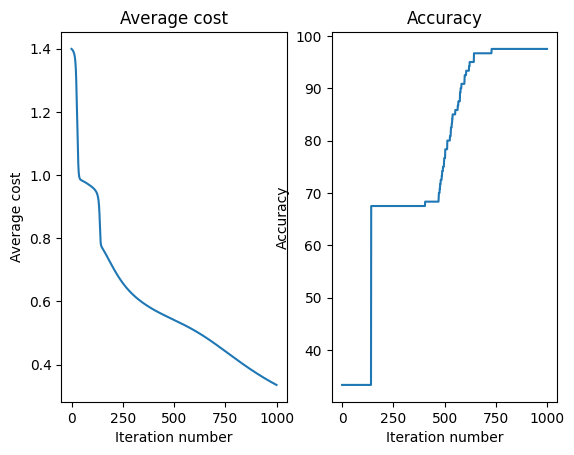

Prediction accuracy: 93.33333333333333%


In [26]:
#주어진 테스트 데이터 세트와 가중치, 편향을 사용하여 신경망의 출력을 반환
def predict_y(X, W1, W2, b1, b2):

    dataset_size=X.shape[0]

    y=np.zeros((dataset_size, 3))

    for i in range(dataset_size):
        a1,a2,a3,z2,z3 = feed_forward(X[i,:],W1,W2,b1,b2)
        y[i]=a3
    return y

if __name__ == "__main__":

    #csv 파일로부터 데이터를 가져와 가공

    #붓꽃 품종을 딕셔너리로 정의하여 문자열로 된 라벨을 숫자 값 라벨로 변환하는데 사용
    Species_Dict={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}

    X=[]
    Y=[]

    with open('Iris.csv', newline='') as file:
        reader=csv.reader(file)
        try:
            for i, row in enumerate(reader):
                if i>0:
                    #csv로부터 읽어온 데이터를 리스트에 저장
                    X.append(np.array(row[1:5], dtype="float64"))
                    Y.append(Species_Dict[row[-1]])

            #데이터가 저장된 리스트를 넘파이 배열로 변환
            X=np.array(X)
            Y=np.array(Y)

        except csv.Error as e:
            sys.exit('file {}, line {}: {}'.format(filename, reader.line_num, e))

    #(0,1,2) 값을 가지는 라벨을 one-hot 인코딩하여 {0 0 1, 0 1 0, 1 0 0}로 변환

    Y=convert_y_to_one_hot_vector(Y, vector_length=3)

    #데이터 세트를 무작위로 배열
    s=np.arange(Y.shape[0])
    np.random.seed(0)
    np.random.shuffle(s)

    Y=Y[s]
    X=X[s]

    #학습용 데이터(X_train,Y_train)와 테스트용 데이터(X_test,Y_test)를 8:2 비율로 사용

    size=len(Y)
    p=int(size * 0.8)

    X_train=X[0:p]
    Y_train=Y[0:p]
    X_test=X[p:]
    Y_test=Y[p:]

    #신경망을 구성하는 레이어의 노드 개수
    node_size={
        'input_layer_size':4,
        'hidden_layer_size':8,
        'output_layer_size':3
    }

    #역전파 알고리즘에서 사용하는 학습률
    learning_rate=0.5

    #신경망을 학습시켜서 가중치와 편향을 반환
    W1, W2, b1, b2, list_avg_cost, list_accuracy=train(X_train, Y_train, node_size=node_size, max_iteration=1000, learning_rate=learning_rate)

    #비용과 정확도를 그래프로 그림
    Figure, ax=plt.subplots(1, 2)

    ax[0].title.set_text('Average cost')
    ax[1].title.set_text('Accuracy')

    ax[0].plot(list_avg_cost)
    ax[1].plot(list_accuracy)

    ax[0].set_ylabel('Average cost')
    ax[0].set_xlabel('Iteration number')

    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Iteration number')

    plt.show()

    #테스트 데이터 세트를 사용하여 예측 정확성 테스트
    y_pred=predict_y(X_test, W1, W2, b1, b2)

    print('Prediction accuracy: {}%'.format(compute_accuracy(Y_test, y_pred)))